In [1]:
# Genomic density plots

In [2]:
# Parameters
INSERTIONS = "0.5.21.filtered_calls_prosgfp_heads.gff"
LABEL = "ProsGFP calls heads"
SAMPLE_FILE = "ProsGFP_head_samples.csv"


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pybedtools
from matplotlib import transforms


from seaplotlib.helper import despine

%matplotlib inline

In [4]:
insertions = pybedtools.BedTool(INSERTIONS).sort().to_dataframe()

In [5]:
insertions.seqname.unique()

subset = insertions[insertions.seqname == '2L']
subset['Distance'] = np.log10(subset.start.diff())
subset_2 = insertions[insertions.seqname == '3R']
subset_2['Distance'] = np.log10(subset_2.start.diff())

/Users/mvandenb/miniconda3/envs/somatic-transposition-fly-intestine/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mvandenb/miniconda3/envs/somatic-transposition-fly-intestine/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/Users/mvandenb/miniconda3/envs/somatic-transposition-fly-intestine/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


/Users/mvandenb/miniconda3/envs/somatic-transposition-fly-intestine/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mvandenb/miniconda3/envs/somatic-transposition-fly-intestine/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


/Users/mvandenb/miniconda3/envs/somatic-transposition-fly-intestine/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mvandenb/miniconda3/envs/somatic-transposition-fly-intestine/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


/Users/mvandenb/miniconda3/envs/somatic-transposition-fly-intestine/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/mvandenb/miniconda3/envs/somatic-transposition-fly-intestine/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mvandenb/miniconda3/envs/somatic-transposition-fly-intestine/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem

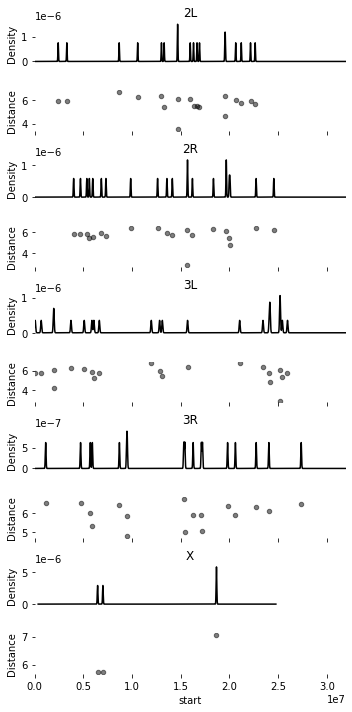

In [6]:
chroms = ['2L', '2R', '3L', '3R', 'X']
max_x = insertions.start.max()

nrows = len(chroms) * 2

fig, axes = plt.subplots(ncols=1, nrows=nrows, figsize=(5, nrows), sharex=True)
def plot_density_distance(subset, axes):
    seq = subset.reset_index().seqname.loc[0]
    despine(subset.start.plot.kde(ind=100000, bw_method=0.005, xlim=(0, 31914491), ax=axes[0], color='k'))
    axes[0].get_xaxis().set_visible(False)
    axes[0].set_title(seq)
    despine(subset.plot.scatter(x='start', y='Distance', xlim=(0, 31914491), alpha=0.5, ax=axes[1], color='k'))
    plt.tight_layout()

for i, chrom in enumerate(chroms):
    subset = insertions[insertions['seqname'] == chrom].reset_index()
    subset['Distance'] = np.log10(subset.start.diff())
    # First insertion shares distance with 2nd
    try:
        # Fails if no insertions on chromosome. that's fine
        subset['Distance'].loc[0] = subset['Distance'].loc[1]
        # first dot shares distance with second
        plot_density_distance(subset, axes=axes[i*2:i*2+2])
    except Exception:
        pass

fig.savefig('Density and Rainfall %s.pdf' % LABEL)